<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-log-linear-regression/polynomial-log-linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [26]:
df_url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv"
df = pd.read_csv(df_url, sep=',')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df = df[["Id", "MSSubClass", "LotFrontage", "LotArea", "SalePrice"]]

In [0]:
df.head(900)

In [0]:
df.fillna(method='ffill', inplace=True)

98968.58347760081x**0 + 9.583989914394047x**1 + -0.00011413460960579063x**2 + 3.574838717884112e-10x**3 + -2.2699466546878544e-15x**4 + -5.874613946341145e-16x**5 + -4.461762990320972e-16x**6
R^2 0.16982963998013412


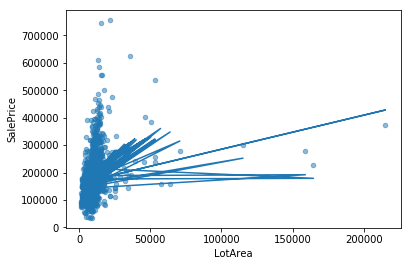

In [42]:
# Separate dependent and independent variables
target = 'SalePrice'
features = ['LotFrontage', 'LotArea']
y = df[target]
X = df[features]

def polynomial_regression(degrees=2):
    
    # Make polynomial features
    feature = 'LotArea'
    polynomial_features = []
    for degree in range(2, degrees+1):
        name = f'{feature} ** {degree}'
        df[name] = df[feature] ** degree
        polynomial_features.append(name)
    
    features = [feature] + polynomial_features
    target  = 'SalePrice'
    X = df[features]
    y = df[target]
    model = LinearRegression()
    model.fit(X, y)
    
    ax = df.plot(x=feature, y=target, kind='scatter', alpha=0.5)
    ax.plot(df[feature], model.predict(X))
    betas = [model.intercept_] + model.coef_.tolist()
    equation = ' + '.join(f'{beta}x**{i}' for i, beta in enumerate(betas))
    print(equation)
    print('R^2', model.score(X, y))
    
polynomial_regression(6)

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data